# Agrupando colores

Vamos a crear imagenes con una cantidad fija de colores

#### 1. Importa las librerias
Vamos a necesitar `KMeans` de `sklearn.cluster`, `imread` de `matplotlib.image`, `matplotlib.pyplot` y `numpy`


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

#### 2. Lee una imagen
Utiliza alguna foto que tengas en tu ordenador y leela con la función `imread`

Consejo: utiliza una imagen pequeña si no quieres tardar una eternidad en que se ejecute el kmeans

In [3]:
image = plt.imread('data/test_kmeans.PNG')
image.shape

(363, 703, 4)

In [11]:
image

array([[[0.62352943, 0.6901961 , 0.7058824 , 1.        ],
        [0.6313726 , 0.69411767, 0.70980394, 1.        ],
        [0.63529414, 0.7019608 , 0.70980394, 1.        ],
        ...,
        [0.98039216, 0.9843137 , 0.9843137 , 1.        ],
        [0.9843137 , 0.9882353 , 0.9882353 , 1.        ],
        [0.9843137 , 0.9882353 , 0.9882353 , 1.        ]],

       [[0.62352943, 0.6901961 , 0.7058824 , 1.        ],
        [0.6313726 , 0.69803923, 0.70980394, 1.        ],
        [0.63529414, 0.7019608 , 0.70980394, 1.        ],
        ...,
        [0.99607843, 1.        , 1.        , 1.        ],
        [0.99607843, 1.        , 0.99607843, 1.        ],
        [0.99607843, 1.        , 0.99607843, 1.        ]],

       [[0.6313726 , 0.69411767, 0.7058824 , 1.        ],
        [0.63529414, 0.7019608 , 0.70980394, 1.        ],
        [0.6392157 , 0.7058824 , 0.7137255 , 1.        ],
        ...,
        [0.99215686, 0.99607843, 0.99215686, 1.        ],
        [0.99607843, 1.      

Muestra la imagen para ver que se ha cargado bien

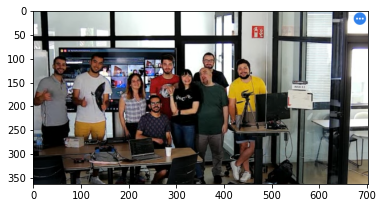

In [4]:
plt.imshow(image)

#### 3. Modifica la estructura de la imagen
Queremos que cada pixel sea una observación por lo que tenemos que transformar nuestra imagen de un vector de forma (alto, ancho, color) a (alto x ancho, color). Color será siempre 3, que son los tres canales de los colores.

Ej: (300, 400, 3) -> (120000, 3)

In [8]:
363*703

255189

In [16]:
X = image.reshape(-1, 4)
X.shape

(255189, 4)

#### 4. K-means
Haz un k-means con la imagen de entrada (Con la nueva forma que le hemos dado). K será el número de colores que quieras que tenga tu imagen de salida

In [37]:
k = 12
kmeans = KMeans(n_clusters=k, random_state=10).fit(X)

#### 5. Sustituye cada valor por su centroide

Una vez hemos entrenado el kmeans entre otros parametros de salida tiene `cluster_centers_` y `labels_`. Utilizlos para crear una nueva imagen (recuerda que las imagenes simplemente son vectores numéricos) en la que cada pixel se sustituye por su centroide correspondiente.

In [31]:
kmeans.labels_

array([3, 3, 3, ..., 3, 3, 3])

In [32]:
kmeans.cluster_centers_

array([[0.6962913 , 0.5004933 , 0.25170928, 1.        ],
       [0.7832922 , 0.8034655 , 0.79671323, 1.        ],
       [0.03366536, 0.0358552 , 0.03486243, 1.        ],
       [0.6341398 , 0.6430416 , 0.64441836, 1.        ],
       [0.34166455, 0.28878623, 0.2699561 , 1.        ],
       [0.44901368, 0.46385723, 0.47671118, 1.        ],
       [0.96254385, 0.97799164, 0.97380626, 1.        ],
       [0.15662295, 0.14935654, 0.15108857, 1.        ]], dtype=float32)

In [38]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]

#### 6. Modifica la estructura de la imagen
Para trabajar con el k-means requeriamos que la imagen original fuese un solo vector, ahora como queremos volver a tener la imagen para volver mostrarla debemos hacer el proceso inverso a el paso 3. (Si has guardado la forma de la imagen original te será más facil hacer este paso)

In [34]:
segmented_img.shape

(255189, 4)

#### 7. Imprime y guarda en tu ordenador la imagen resultante

In [39]:
segmented_img = segmented_img.reshape(image.shape)

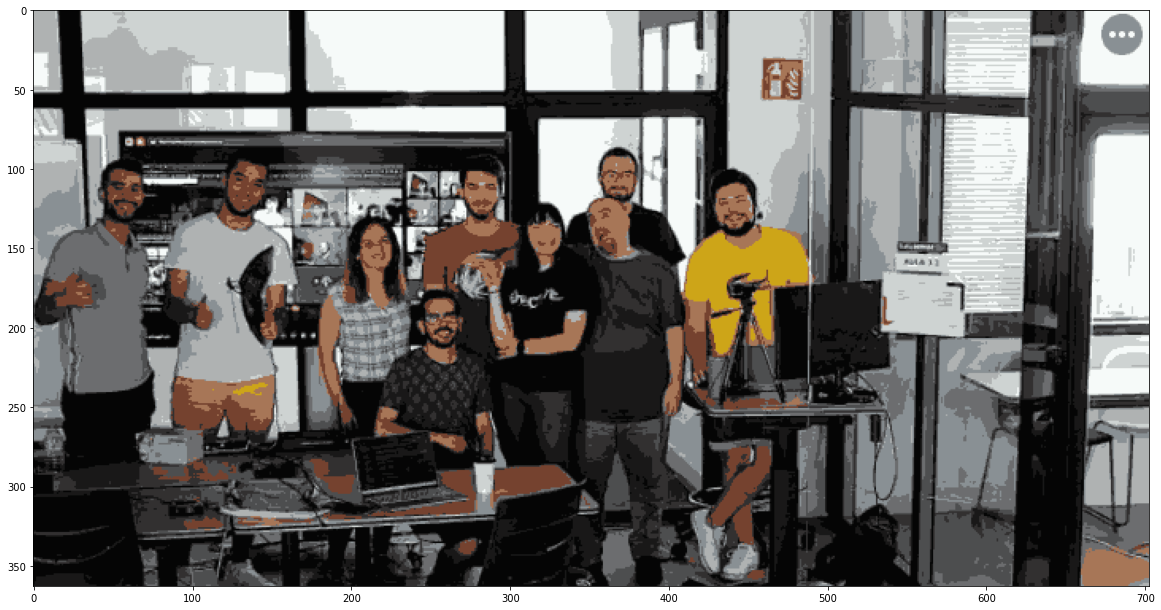

In [40]:
fig = plt.figure(figsize=(20,20))

plt.imshow(segmented_img)

In [41]:
fig.savefig('data/test_kmeans_output.png')

#### 8. Crea una función
Crea una función que tenga como argumentos de entrada una imagen, el numero de colores que quieres que tenga, y si se quiere guardar o mostrar por pantalla

In [51]:
def cluster_colors(image, n_colors, save=False):
    image = plt.imread(image)
    X = image.reshape(-1,4)

    kmeans = KMeans(n_clusters=n_colors).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    fig = plt.figure(figsize=(20,20))
    plt.imshow(segmented_img.reshape(image.shape))
    
    if save:
        fig.savefig('mi_imagen.png')

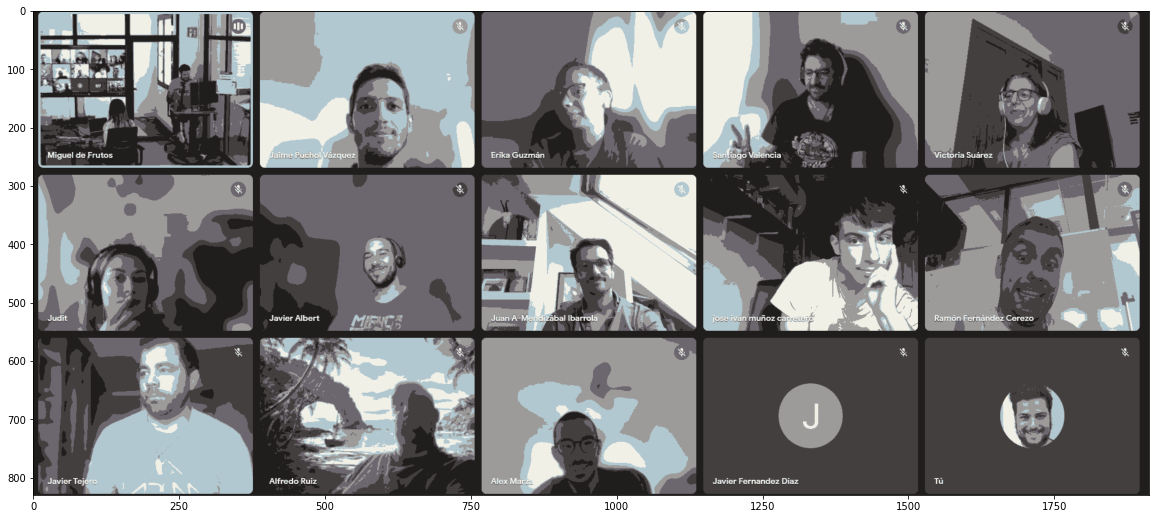

In [52]:
cluster_colors('data/test_kmeans2.PNG', 6, save=True)

In [ ]:
# for image in folder:
#     cluster_colors(---)

# Con JPG?

In [65]:
from matplotlib.image import imread

In [68]:
image = imread('data/sunset.jpg')
image.shape

(400, 600, 3)

In [71]:
image

array([[[13, 35, 84],
        [13, 35, 84],
        [14, 36, 85],
        ...,
        [ 2, 34, 85],
        [ 2, 35, 83],
        [ 2, 35, 83]],

       [[13, 35, 84],
        [13, 35, 84],
        [14, 36, 85],
        ...,
        [ 2, 34, 85],
        [ 2, 35, 83],
        [ 2, 35, 83]],

       [[14, 36, 85],
        [14, 36, 85],
        [15, 37, 87],
        ...,
        [ 3, 35, 86],
        [ 3, 36, 84],
        [ 3, 36, 84]],

       ...,

       [[ 9, 14, 28],
        [ 9, 14, 28],
        [ 9, 14, 28],
        ...,
        [ 6,  4, 14],
        [ 4,  5, 12],
        [ 4,  5, 12]],

       [[ 9, 14, 28],
        [ 9, 14, 28],
        [ 9, 14, 28],
        ...,
        [ 6,  4, 14],
        [ 4,  5, 12],
        [ 4,  5, 12]],

       [[ 9, 14, 28],
        [ 9, 14, 28],
        [ 9, 14, 28],
        ...,
        [ 6,  4, 14],
        [ 4,  5, 12],
        [ 4,  5, 12]]], dtype=uint8)

In [72]:
image.max()

255

In [73]:
X = image.reshape(-1,3)

In [74]:
kmeans = KMeans(n_clusters=10).fit(X)


In [75]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]

In [86]:
# segmented_img.astype('int')
# segmented_img/255

array([[37, 37, 66],
       [37, 37, 66],
       [37, 37, 66],
       ...,
       [16, 18, 35],
       [16, 18, 35],
       [16, 18, 35]])

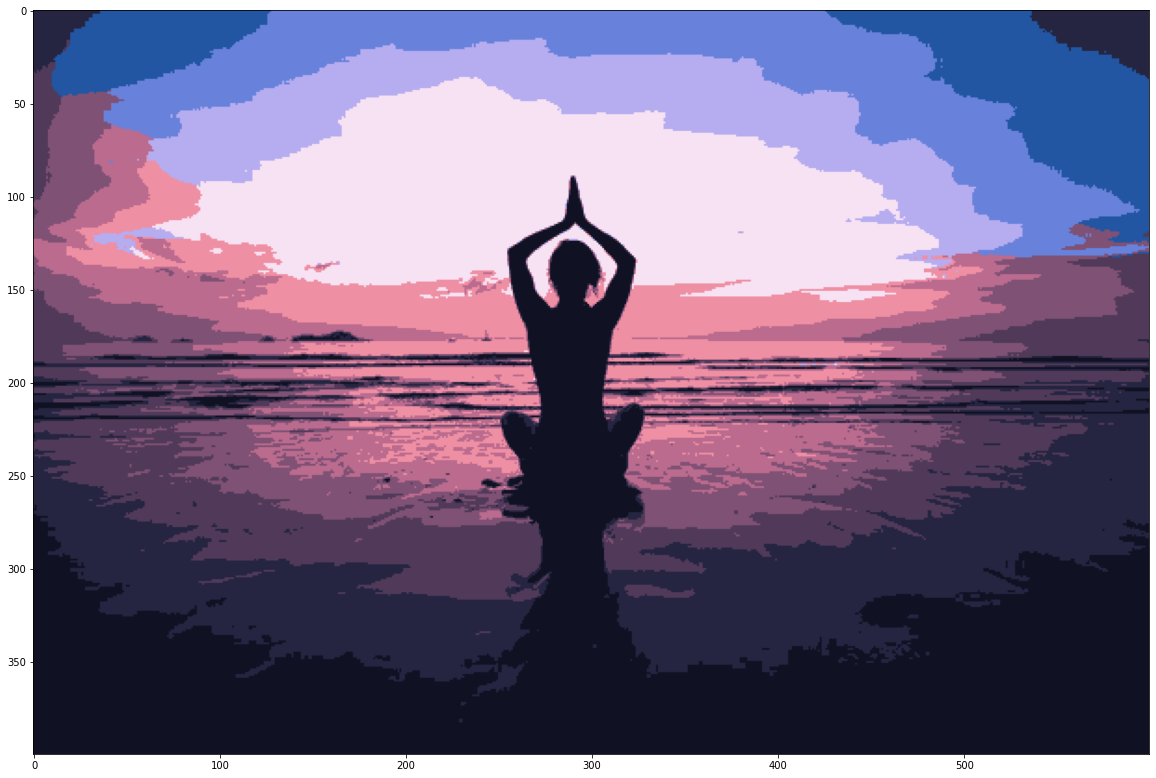

In [87]:
fig = plt.figure(figsize=(20,20))
plt.imshow(segmented_img.astype('int').reshape(image.shape))